<center><h1>IBM Certified Data Scientist </h1>
<h1>Capstone Project </h1>
<h2>The Battle of Neighborhoods </h2> </center>

<h2> 1) Introduction </h2>

<t> Few investors came together and decided to invest in opening a new Indian Restaurant in Boston. The Boston metro area has seen an explosive growth in Indian diaspora in the past decade. Mostly around the Boston Metro, Cambridge and Somerville areas. The investors have suggested 5 places they think it would be a better choice.
    These investors hired me along with my team to identify a suitable location for this restaurant. And we are planning to use the techniques we have learned the the past 8 courses. including the methods used in identifying, collecting, cleaning data, identifying the correct method to use to get the best outcome and suggest the best location for this restaurant. 
    
<h3> 2) Data Collection </h3>
    Location details for the existing Indian restaurants will be taken from FourSquare, using their non-commercial API's
    Geo-coordinates for all locations will be received from Google Maps, suing the API's offered by Google. 
    
<h3> 3) Methodology </h3>
    So the idea is to analyze the neighborhoods of the existing restaurants and compare it with the new/proposed locations. If there are any similarities/attributes among these neighborhoods, pick the location which matches the most of the existing India restaurant and propose it to the investors. 

<h3> 4) Decision Making </h3>
    Data analytic methods will be used to analyze/compare the neighborhood.
    
    
<h3> 5) Results </h3>
        Results section where you discuss the results
   


<h3> 6) Conclusion </h3>
    This section will describe our recommended location and how/why chose this location.

<p>
<p>

<b>First things first, let us load all the libraries we would need </b>

In [7]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

# libraries for displaying images
from IPython.display import Image, HTML, display
from IPython.core.display import HTML 

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

<h2> DATA Collection </h2>

#
#
Now, setup the API parameters to make FoyrSquare Calls. Once these calls are made and results are verified, for security/privacy reasons, 
the user/credential information will be masked.
#

In [160]:
CLIENT_ID = 'Removed for security' # your Foursquare ID
CLIENT_SECRET = 'Removed for security' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Removed for security
CLIENT_SECRET:Removed for security


In [9]:
#setup Boston and its coordinates
#
address = 'Boston, MA'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)
print (location)
print (geolocator)

42.3602534 -71.0582912
Boston, Suffolk County, Massachusetts, USA


In [10]:
#
#setup the query to pull a lsit of indian restaurnts details in jason format,
#
search_query = 'Indian'
radius = 10000
print(search_query + ' ....OK')

Indian ....OK


In [161]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=Removed for security&client_secret=Removed for security&ll=42.39758220462489,-71.17528017707737&v=20180604&query=Indian&radius=10000&limit=50'

In [12]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cebf94ddd57970e247e1bf2'},
 'response': {'venues': [{'id': '5ae8aa8a237dee002c8a6560',
    'name': 'Surya Indian Express',
    'location': {'address': '100 Cambridgeside Pl',
     'lat': 42.36855352400495,
     'lng': -71.07618449736185,
     'labeledLatLngs': [{'label': 'display',
       'lat': 42.36855352400495,
       'lng': -71.07618449736185}],
     'distance': 1737,
     'postalCode': '02141',
     'cc': 'US',
     'city': 'Cambridge',
     'state': 'MA',
     'country': 'United States',
     'formattedAddress': ['100 Cambridgeside Pl',
      'Cambridge, MA 02141',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d10f941735',
      'name': 'Indian Restaurant',
      'pluralName': 'Indian Restaurants',
      'shortName': 'Indian',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1558968653',
    'hasPerk': False},
   {'id': '

In [13]:
# assign relevant part of JSON from FourSquare to venues and create a DF
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",NaN,NaN,NaN,NaN,NaN,NaN,False,5ae8aa8a237dee002c8a6560,100 Cambridgeside Pl,...,1737,"[100 Cambridgeside Pl, Cambridge, MA 02141, Un...","[{'label': 'display', 'lat': 42.36855352400495...",42.368554,-71.076184,02141,MA,Surya Indian Express,v-1558968653,NaN
1,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",325262,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/suryas-indi...,False,56d500be498eda2c7071c4e6,114 Magazine St,...,4265,"[114 Magazine St, Cambridge, MA 02139, United ...","[{'label': 'display', 'lat': 42.35997219708611...",42.359972,-71.110151,02139,MA,Surya Indian Kitchen N Catering,v-1558968653,170310557
2,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",NaN,NaN,NaN,NaN,NaN,NaN,False,4cadebd2d1f8b60c19f372c6,Winter St,...,580,"[Winter St, Boston, MA 02110, United States]","[{'label': 'display', 'lat': 42.35520589, 'lng...",42.355206,-71.060087,02110,MA,Indian Entrees,v-1558968653,NaN
3,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",NaN,NaN,NaN,NaN,NaN,NaN,False,571e47bc498e219562bd3de8,187 Devonshire,...,460,"[187 Devonshire (Milk), Boston, MA, United Sta...","[{'label': 'display', 'lat': 42.356182, 'lng':...",42.356182,-71.057280,NaN,MA,Divine Indian Food,v-1558968653,NaN
4,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",327971,/delivery_provider_grubhub_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",grubhub,https://www.grubhub.com/restaurant/kashmir-279...,False,3fd66200f964a520e5eb1ee3,279 Newbury St,...,2441,"[279 Newbury St (at Gloucester St), Boston, MA...","[{'label': 'display', 'lat': 42.34925187692889...",42.349252,-71.083969,02116,MA,Kashmir Indian Restaurant,v-1558968653,37764740


In [14]:
# keep only columns that include venue name, and any attribute that is associated with location
#
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

   

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Surya Indian Express,Indian Restaurant,100 Cambridgeside Pl,US,Cambridge,United States,NaN,1737,"[100 Cambridgeside Pl, Cambridge, MA 02141, Un...","[{'label': 'display', 'lat': 42.36855352400495...",42.368554,-71.076184,02141,MA,5ae8aa8a237dee002c8a6560
1,Surya Indian Kitchen N Catering,Indian Restaurant,114 Magazine St,US,Cambridge,United States,NaN,4265,"[114 Magazine St, Cambridge, MA 02139, United ...","[{'label': 'display', 'lat': 42.35997219708611...",42.359972,-71.110151,02139,MA,56d500be498eda2c7071c4e6
2,Indian Entrees,Indian Restaurant,Winter St,US,Boston,United States,NaN,580,"[Winter St, Boston, MA 02110, United States]","[{'label': 'display', 'lat': 42.35520589, 'lng...",42.355206,-71.060087,02110,MA,4cadebd2d1f8b60c19f372c6
3,Divine Indian Food,Indian Restaurant,187 Devonshire,US,Boston,United States,Milk,460,"[187 Devonshire (Milk), Boston, MA, United Sta...","[{'label': 'display', 'lat': 42.356182, 'lng':...",42.356182,-71.057280,NaN,MA,571e47bc498e219562bd3de8
4,Kashmir Indian Restaurant,Indian Restaurant,279 Newbury St,US,Boston,United States,at Gloucester St,2441,"[279 Newbury St (at Gloucester St), Boston, MA...","[{'label': 'display', 'lat': 42.34925187692889...",42.349252,-71.083969,02116,MA,3fd66200f964a520e5eb1ee3
5,Menotomy Indian Hunter,Sculpture Garden,Robbins Memorial Garden,US,Arlington,United States,NaN,4843,"[Robbins Memorial Garden, Arlington, MA, Unite...","[{'label': 'display', 'lat': 42.38134082625192...",42.381341,-71.109810,NaN,MA,4e81eb3a61af15d16d9a1899
6,Vivek's Indian Cottage,Indian Restaurant,NaN,US,Boston,United States,NaN,1637,"[Boston, MA, United States]","[{'label': 'display', 'lat': 42.353715, 'lng':...",42.353715,-71.076118,NaN,MA,5168ce2a498e95cfb444acb1
7,Tanjore Indian Restaurant,Indian Restaurant,18 Eliot St,US,Cambridge,United States,JFK Street,5377,"[18 Eliot St (JFK Street), Cambridge, MA 02138...","[{'label': 'display', 'lat': 42.37203744062437...",42.372037,-71.121696,02138,MA,4b4f5291f964a520450127e3
8,Indian Chili Restaurant,Food,100 Cambridgeside Pl,US,Cambridge,United States,NaN,1611,"[100 Cambridgeside Pl, Cambridge, MA 02141, Un...","[{'label': 'display', 'lat': 42.36694, 'lng': ...",42.366940,-71.075670,02141,MA,4f32ab9a19836c91c7ee5244
9,j.m.p. indian cuisine,Indian Restaurant,1095 Commonwealth Ave (super88),US,Allston,United States,NaN,5589,"[1095 Commonwealth Ave (super88), Allston, MA ...","[{'label': 'display', 'lat': 42.35226926767763...",42.352269,-71.125373,02134,MA,4b43beb5f964a5203fe825e3


In [15]:
#Check whether the data collected is releven to restaurant/food catogory. if no, filter the non-relevent data
#
dataframe_filtered['categories']

0                Indian Restaurant
1                Indian Restaurant
2                Indian Restaurant
3                Indian Restaurant
4                Indian Restaurant
5                 Sculpture Garden
6                Indian Restaurant
7                Indian Restaurant
8                             Food
9                Indian Restaurant
10               Indian Restaurant
11               Indian Restaurant
12                       Speakeasy
13    General College & University
14               Indian Restaurant
15               Indian Restaurant
16               Indian Restaurant
17               Indian Restaurant
18               Indian Restaurant
19                          Market
20               Indian Restaurant
21               Indian Restaurant
22                           Trail
23                            None
24               Indian Restaurant
25                      Non-Profit
26                            Food
27               Indian Restaurant
28               Ind

In [16]:
#pickup restaurant data and drop all other records
#
dataframe_filtered_rest = dataframe_filtered[dataframe_filtered.categories == 'Indian Restaurant']

In [17]:
dataframe_filtered_rest


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Surya Indian Express,Indian Restaurant,100 Cambridgeside Pl,US,Cambridge,United States,NaN,1737,"[100 Cambridgeside Pl, Cambridge, MA 02141, Un...","[{'label': 'display', 'lat': 42.36855352400495...",42.368554,-71.076184,02141,MA,5ae8aa8a237dee002c8a6560
1,Surya Indian Kitchen N Catering,Indian Restaurant,114 Magazine St,US,Cambridge,United States,NaN,4265,"[114 Magazine St, Cambridge, MA 02139, United ...","[{'label': 'display', 'lat': 42.35997219708611...",42.359972,-71.110151,02139,MA,56d500be498eda2c7071c4e6
2,Indian Entrees,Indian Restaurant,Winter St,US,Boston,United States,NaN,580,"[Winter St, Boston, MA 02110, United States]","[{'label': 'display', 'lat': 42.35520589, 'lng...",42.355206,-71.060087,02110,MA,4cadebd2d1f8b60c19f372c6
3,Divine Indian Food,Indian Restaurant,187 Devonshire,US,Boston,United States,Milk,460,"[187 Devonshire (Milk), Boston, MA, United Sta...","[{'label': 'display', 'lat': 42.356182, 'lng':...",42.356182,-71.057280,NaN,MA,571e47bc498e219562bd3de8
4,Kashmir Indian Restaurant,Indian Restaurant,279 Newbury St,US,Boston,United States,at Gloucester St,2441,"[279 Newbury St (at Gloucester St), Boston, MA...","[{'label': 'display', 'lat': 42.34925187692889...",42.349252,-71.083969,02116,MA,3fd66200f964a520e5eb1ee3
6,Vivek's Indian Cottage,Indian Restaurant,NaN,US,Boston,United States,NaN,1637,"[Boston, MA, United States]","[{'label': 'display', 'lat': 42.353715, 'lng':...",42.353715,-71.076118,NaN,MA,5168ce2a498e95cfb444acb1
7,Tanjore Indian Restaurant,Indian Restaurant,18 Eliot St,US,Cambridge,United States,JFK Street,5377,"[18 Eliot St (JFK Street), Cambridge, MA 02138...","[{'label': 'display', 'lat': 42.37203744062437...",42.372037,-71.121696,02138,MA,4b4f5291f964a520450127e3
9,j.m.p. indian cuisine,Indian Restaurant,1095 Commonwealth Ave (super88),US,Allston,United States,NaN,5589,"[1095 Commonwealth Ave (super88), Allston, MA ...","[{'label': 'display', 'lat': 42.35226926767763...",42.352269,-71.125373,02134,MA,4b43beb5f964a5203fe825e3
10,Mehak Halal - Pakistani & Indian Cuisine,Indian Restaurant,329 Sumner St,US,East Boston,United States,Cottage Street,1985,"[329 Sumner St (Cottage Street), East Boston, ...","[{'label': 'display', 'lat': 42.367132, 'lng':...",42.367132,-71.036017,02128,MA,4c31069ba0ced13a690c136e
11,Shanti Indian Cuisine,Indian Restaurant,7 Broad Canal Way,US,Cambridge,United States,Third Street,2047,"[7 Broad Canal Way (Third Street), Cambridge, ...","[{'label': 'display', 'lat': 42.36327046683388...",42.363270,-71.082842,02142,MA,56cc9faa498e60f71daf6e9f


In [18]:
#plot the restaurance locations, in Boston
#
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Boston City Center

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Boston, MA',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered_rest.lat, dataframe_filtered_rest.lng, dataframe_filtered_rest.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

In [20]:
#copies selected columns from a df to another
df_ind_rest = dataframe_filtered_rest[['name', 'address', 'city',  'lat', 'lng']].copy()


In [22]:
#Rename the columns in a more meaning fuld ones
#
df_ind_rest.columns = ['Name', 'Address', 'City',  'Latitude', 'Longitude']


In [23]:
#Now combine the Address and City columns into a single column and name it AddressN - a new column table in the dataframe
#
df_ind_rest["AddressN"] = df_ind_rest["Address"].map(str) + ', ' + df_ind_rest["City"] + ', MA'

#drop the old address column and Move the new column AddressN to the right place
df_ind_rest = df_ind_rest[['Name', 'AddressN', 'Latitude', 'Longitude']]
df_ind_rest_N = df_ind_rest.rename(columns={"AddressN":"Address"})

# With this move, we should have the desired data in df_ind_rest_N df
# let us list it to see.
#

df_ind_rest_N


,Name,Address,Latitude,Longitude
0,Surya Indian Express,"100 Cambridgeside Pl, Cambridge, MA",42.368554,-71.076184
1,Surya Indian Kitchen N Catering,"114 Magazine St, Cambridge, MA",42.359972,-71.110151
2,Indian Entrees,"Winter St, Boston, MA",42.355206,-71.060087
3,Divine Indian Food,"187 Devonshire, Boston, MA",42.356182,-71.057280
4,Kashmir Indian Restaurant,"279 Newbury St, Boston, MA",42.349252,-71.083969
6,Vivek's Indian Cottage,"nan, Boston, MA",42.353715,-71.076118
7,Tanjore Indian Restaurant,"18 Eliot St, Cambridge, MA",42.372037,-71.121696
9,j.m.p. indian cuisine,"1095 Commonwealth Ave (super88), Allston, MA",42.352269,-71.125373
10,Mehak Halal - Pakistani & Indian Cuisine,"329 Sumner St, East Boston, MA",42.367132,-71.036017
11,Shanti Indian Cuisine,"7 Broad Canal Way, Cambridge, MA",42.363270,-71.082842


In [26]:
# use college locations as a driver and use the below colleges as primary target locations. 
# big shopping centers will be targetted around these places to find a target. 
# existing restaurants around this area will be used as models

#College data comes from the below site:
    #https://collegestats.org/colleges/massachusetts/largest/
    #School Name              City/State       # of Students
    #Boston University        Boston, MA       41,428
    #Harvard University       Cambridge, MA    35,611
    #Northeastern University  Boston, MA       26,439
    #Bunker Hill College      Boston, MA       21,826
    #Universitu of Mass       Boston, MA       21,027

# proposed_loc = [
#    {'Location' : 'L1', 'Address' : 'Boston University, Boston, MA' },
#    {'Location' : 'L2', 'Address' : 'Harvard University, Cambridge, MA' },     
#    {'Location' : 'L3', 'Address' : 'Northeastern University, Boston, MA' },
#    {'Location' : 'L4', 'Address' : 'Bunker Hill College, Boston, MA'} ,
#    {'Location' : 'L5', 'Address' : 'UMASS Boston, Boston, MA'} 
#] 


proposed_loc = [
    {'Location' : 'L1', 'Address' : 'Copley Place, Boston, MA' },
    {'Location' : 'L2', 'Address' : 'Prudential Center, Boston, MA' },     
    {'Location' : 'L3', 'Address' : 'The Atrium, Cambridge, MA' },
    {'Location' : 'L4', 'Address' : 'Assembly Row, Somerville, MA'} ,
    {'Location' : 'L5', 'Address' : 'Faneuil Hall Marketplace, Boston, MA'} 
]


In [27]:
#Install Googlemaps so that Goole API's can be used to pull geo coordinates of the locations

In [28]:
# install the google map api client library
!pip install -U googlemaps

  Stored in directory: /home/jupyterlab/.cache/pip/wheels/3c/3f/25/ce6d7722dba07e5d4a12d27ab38f3d7add65ef43171b02c819
Successfully built googlemaps


In [30]:
#once completed, the API keys will be masked
#
google_act = None
    
GOOGLE_MAP_API_KEY = 'Removed for security'  

import googlemaps
gmaps = googlemaps.Client(key=GOOGLE_MAP_API_KEY)

In [32]:
#
# define a function to retrieve geolocation. Thisj will be used in multiple places below, to pull location coordinates using address from dataframes
#
def getLatLng(address):
    latlnt = gmaps.geocode('{}, USA'.format(address))
    return (latlnt[0]['geometry']['location']['lat'], latlnt[0]['geometry']['location']['lng'])

In [33]:
for loc in proposed_loc:        
    (lat, lng) = getLatLng(loc['Address'])
    loc['Latitude'] = lat
    loc['Longitude'] = lng
    
df_proposed_loc = pd.DataFrame(proposed_loc, columns=['Location', 'Address', 'Latitude', 'Longitude'])
df_proposed_loc

,Location,Address,Latitude,Longitude
0,L1,"Copley Place, Boston, MA",42.347149,-71.077828
1,L2,"Prudential Center, Boston, MA",42.347345,-71.082503
2,L3,"The Atrium, Cambridge, MA",42.374167,-71.120549
3,L4,"Assembly Row, Somerville, MA",42.393878,-71.079055
4,L5,"Faneuil Hall Marketplace, Boston, MA",42.360250,-71.054743


In [80]:
#
# favorite restaurants with high ratings and number of reviews, suggested by the stakeholder. Number of Reviews are for info purpose only 
# data from [Google.com]
# & create share holders favorits dataframe
sh_favs = [
    {'Name': 'Himalayan Kitchen', 'Rating': 4.7, 'Reviews': 196 },
    {'Name': 'Vaisakhi Indian Kitchen', 'Rating': 4.6, 'Reviews': 105 },
    {'Name': 'Punjabi Dhaba', 'Rating': 4.2, 'Reviews': 881 },
    {'Name': 'Punjab Palace', 'Rating': 4.2, 'Reviews': 343 },
    {'Name': 'Mehak Halal - Pakistani & Indian Cuisine', 'Rating': 4.1, 'Reviews': 258 },
]
df_sh_favs = pd.DataFrame(sh_favs, columns=['Name','Rating'])
df_sh_favs

,Name,Rating
0,Himalayan Kitchen,4.7
1,Vaisakhi Indian Kitchen,4.6
2,Punjabi Dhaba,4.2
3,Punjab Palace,4.2
4,Mehak Halal - Pakistani & Indian Cuisine,4.1


<h3> Explore the neighborhood for eating, Shopping and Public transportation facility using the API offered by FourSquare</h3>

The key to be a successful restaurant is to have as much as foot traffic. Usually foot traffic is around food, entertainment and shopping areas with good transportation facilities like metro station and/or bus services. Using FourSquare, these places will be explored. We would also set a 750m distance. it is considered a reasonable distance to walk within 5 minutes.

<br>

<b>Following type of venue category will be used to search</b>

In [36]:
#foursquare venu catogories [https://developer.foursquare.com/docs/resources/categories]

fs_venu_cats = {
    'Metro Station': '4bf58dd8d48988d1fd931735',
    'Bus Stop': '52f2ab2ebcbc57f1066b8b4f',
    'Nightlife Spot': '4d4b7105d754a06376d81259',
    'Arts & Entertainment' : '4d4b7104d754a06370d81259',
    'Shop & Service' : '4d4b7105d754a06378d81259',
    'Food': '4d4b7105d754a06374d81259'
}

In [38]:
', '.join([ cat for cat in fs_venu_cats])

'Metro Station, Bus Stop, Nightlife Spot, Arts & Entertainment, Shop & Service, Food'

In [39]:
fs_venu_cats

{'Metro Station': '4bf58dd8d48988d1fd931735',
 'Bus Stop': '52f2ab2ebcbc57f1066b8b4f',
 'Nightlife Spot': '4d4b7105d754a06376d81259',
 'Arts & Entertainment': '4d4b7104d754a06370d81259',
 'Shop & Service': '4d4b7105d754a06378d81259',
 'Food': '4d4b7105d754a06374d81259'}

In [40]:
restaurants = df_ind_rest_N.loc[0]
restaurants

Name                        Surya Indian Express
Address      100 Cambridgeside Pl, Cambridge, MA
Latitude                                 42.3686
Longitude                               -71.0762
Name: 0, dtype: object

In [ ]:
print('Use the first restaurant "{}" in the list as example to explore venues nearyby'.format(restaurants['Name']))

In [42]:
# Install FourSquare client library
!pip install foursquare

  Stored in directory: /home/jupyterlab/.cache/pip/wheels/50/82/db/97c078881efb89f4e89560487926fbadfff87a40e5fe41f6fb
Successfully built foursquare


In [43]:
import foursquare
import json, requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
fs = foursquare.Foursquare(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)

# set radius to 750m; should be within a 5 minutes  walking distance 
RADIUS = 750 

In [44]:
# Define a function to search nearby information and convert the result as dataframe
#
def venues_nearby(latitude, longitude, category, verbose=True):    
    results = fs.venues.search(
        params = {
            'query': category, 
            'll': '{},{}'.format(latitude, longitude),
            'radius': RADIUS,
            'categoryId': fs_venu_cats[category]
        }
    )    
    df = json_normalize(results['venues'])
    cols = ['Name','Latitude','Longitude']    
    if( len(df) == 0 ):        
        df = pd.DataFrame(columns=cols)
    else:        
        df = df[['name','location.lat','location.lng']]
        df.columns = cols
    if( verbose ):
        print('{} "{}" venues are found within {}m of location'.format(len(df), category, RADIUS))
    return df

In [45]:
# Find subway stations near-by
venues_nearby(restaurants['Latitude'], restaurants['Longitude'], 'Metro Station').head()

3 "Metro Station" venues are found within 750m of location


,Name,Latitude,Longitude
0,MBTA Lechmere Station,42.370929,-71.077212
1,MBTA Community College Station,42.373732,-71.069698
2,MBTA Science Park / West End Station,42.366744,-71.067782


In [46]:
# Find bus stops near-by
venues_nearby(restaurants['Latitude'], restaurants['Longitude'], 'Bus Stop').head()

5 "Bus Stop" venues are found within 750m of location


,Name,Latitude,Longitude
0,Super Duck Stop Havard,42.367180,-71.076683
1,Cambridgeside Galleria Shuttle Stop,42.366987,-71.076557
2,EZRide - Lechmere Stop,42.370476,-71.077410
3,MGH-ASR Shuttle Stop 3,42.363880,-71.067830
4,MGH Shuttle Stop 1,42.364081,-71.067939


In [47]:
# Nightlife spots stops near-by
venues_nearby(restaurants['Latitude'], restaurants['Longitude'], 'Nightlife Spot').head()

1 "Nightlife Spot" venues are found within 750m of location


,Name,Latitude,Longitude
0,HubSpot Beer Garden,42.370123,-71.076663


In [48]:
# Find 'Shop & Service' near-by
venues_nearby(restaurants['Latitude'], restaurants['Longitude'], 'Shop & Service').head()


8 "Shop & Service" venues are found within 750m of location


,Name,Latitude,Longitude
0,The Body Shop,42.368136,-71.076238
1,MOS Gift Shop,42.367420,-71.070190
2,Science Museum Gift Shop,42.367470,-71.070202
3,David And Luis barber shop,42.371382,-71.083109
4,Bill's Barber Shop,42.371717,-71.083112


In [49]:
# Find Arts and entertainment places near-by
venues_nearby(restaurants['Latitude'], restaurants['Longitude'], 'Arts & Entertainment').head()

1 "Arts & Entertainment" venues are found within 750m of location


,Name,Latitude,Longitude
0,Multicultural Arts Center,42.369867,-71.079053


<h2> 3) Methodology </h2>
Methodology section represents the main part of the report and discuss and describe any exploratory data analysis is done, any inferential statistical testing performed, and the machine learnings used and why.

By exploring the neighborhood using FourSquare API which provides details on number of venues of different categories around existing Indian restaurants. This provides a base line of the neighborhood. This is captured in a table and analyzed. This data provides a baseline characteristics of existing Indian restaurants' neighborhood.  I used this data to train datasets, and identify the best knows X's.  

The list of locations offered by Stakeholder's data will be combined with the matrix of data collected using neighborhood restaurants to become a weighted matrix of favorite cinema.

The weighted matrix can be applied on 5 target locations with venues information to generate a ranking result. The the top one on the ranking list can be recommended to the stakeholder.

Before the matrix is built for the existing restaurants, data needs to be cleaned and some analyzed. 

In [52]:
from pathlib import Path

rest_venues_csv = Path('./rest_venues.csv')
df_venues = None

# check the venues data is explored and downloaded 
if( rest_venues_csv.exists() ):
    df_venues = pd.read_csv('./rest_venues.csv')
else:    
    # construct a dataframe to store data
    df_venues = pd.DataFrame(columns=['Rest Name', 'Category', 'Name', 'Latitude', 'Longitude'])
    for (name, address, latitude, longitude) in df_ind_rest_N.itertuples(index=False):
        for cat, cat_id in fs_venu_cats.items():
            df = venues_nearby(latitude, longitude, cat, verbose=False)
            df['Rest Name'] = name
            df['Category'] = cat
            df_venues = df_venues.append(df, sort=True)
    df_venues.to_csv('rest_venues.csv', index=False)

In [54]:
#Check number of places we pulled for analysis
#
print('Total {} of venues are found'.format(len(df_venues)))

Total 833 of venues are found


In [55]:
# check the shape of data
df_venues.shape

(833, 5)

In [56]:
# check some data
df_venues

,Category,Latitude,Longitude,Name,Rest Name
0,Metro Station,42.370929,-71.077212,MBTA Lechmere Station,Surya Indian Express
1,Metro Station,42.373732,-71.069698,MBTA Community College Station,Surya Indian Express
2,Metro Station,42.366744,-71.067782,MBTA Science Park / West End Station,Surya Indian Express
0,Bus Stop,42.367180,-71.076683,Super Duck Stop Havard,Surya Indian Express
1,Bus Stop,42.366987,-71.076557,Cambridgeside Galleria Shuttle Stop,Surya Indian Express
2,Bus Stop,42.370476,-71.077410,EZRide - Lechmere Stop,Surya Indian Express
3,Bus Stop,42.363880,-71.067830,MGH-ASR Shuttle Stop 3,Surya Indian Express
4,Bus Stop,42.364081,-71.067939,MGH Shuttle Stop 1,Surya Indian Express
0,Nightlife Spot,42.370123,-71.076663,HubSpot Beer Garden,Surya Indian Express
0,Arts & Entertainment,42.369867,-71.079053,Multicultural Arts Center,Surya Indian Express


In [57]:
df_venues['Category'].value_counts().to_frame(name='Count')

,Count
Shop & Service,289
Food,243
Bus Stop,137
Metro Station,93
Arts & Entertainment,65
Nightlife Spot,6


In [58]:
# Check the locations where the category has a low representation 
df_venues[df_venues.Category=='Nightlife Spot']

,Category,Latitude,Longitude,Name,Rest Name
0,Nightlife Spot,42.370123,-71.076663,HubSpot Beer Garden,Surya Indian Express
0,Nightlife Spot,42.365592,-71.119939,Rameez's Muy Caliente PreGame/Afterparty Spot,Tanjore Indian Restaurant
0,Nightlife Spot,42.336898,-71.073849,The Spot,Akbar Indian
0,Nightlife Spot,42.340045,-71.146164,The Gooch Spot,Vaisakhi Indian Kitchen
0,Nightlife Spot,42.340045,-71.146164,The Gooch Spot,Indian Cafe
0,Nightlife Spot,42.369493,-71.109726,"Spicey's ""Z"" Spot",India Pavilion


In [59]:
#drop these records because of the insignificant occurances
df_venues.drop(df_venues.Category=='Nightlife Spot', inplace=True)

In [60]:
df_venues[df_venues.Category=='Nightlife Spot']

,Category,Latitude,Longitude,Name,Rest Name


In [62]:
df_venues_count = df_venues.groupby(['Rest Name','Category'], as_index=False).count()
df_venues_count.drop(columns=['Latitude','Longitude'], inplace=True)
df_venues_count.rename(columns={'Name':'Count'}, inplace=True)
df_venues_count.head()

,Rest Name,Category,Count
0,Akbar Indian,Arts & Entertainment,8
1,Akbar Indian,Bus Stop,6
2,Akbar Indian,Food,13
3,Akbar Indian,Metro Station,2
4,Akbar Indian,Shop & Service,9


In [63]:
df_venues_count = df_venues_count.pivot(index='Rest Name', columns='Category', values='Count').fillna(0)
df_venues_count.head()

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
Rest Name,,,,,
Akbar Indian,8.0,6.0,13.0,2.0,9.0
Bukhara,0.0,0.0,1.0,0.0,7.0
Chakra Indian Cuisine,0.0,1.0,0.0,0.0,3.0
Divine Indian Food,5.0,14.0,28.0,10.0,28.0
Halal Indian Cuisine,0.0,0.0,1.0,5.0,3.0


In [64]:
df_target_venues = pd.DataFrame(columns=['Location', 'Category', 'Name', 'Latitude', 'Longitude'])
for (location, address, latitude, longitude) in df_proposed_loc.itertuples(index=False):
    for cat, cat_id in fs_venu_cats.items():
        df = venues_nearby(latitude, longitude, cat, verbose=False)
        df['Location'] = location
        df['Category'] = cat
        df_target_venues = df_target_venues.append(df, sort=True)

In [66]:
df_target_venues.head()

,Category,Latitude,Location,Longitude,Name
0,Metro Station,42.347506,L1,-71.075058,MBTA Back Bay Station (BBY)
1,Metro Station,42.349920,L1,-71.077981,MBTA Copley Station
2,Metro Station,42.345753,L1,-71.081551,MBTA Prudential Station
3,Metro Station,42.347900,L1,-71.087918,MBTA Hynes Convention Center Station
4,Metro Station,42.351812,L1,-71.071175,MBTA Arlington Station


In [67]:
df_target_venues['Category'].value_counts().to_frame(name='Count')

,Count
Shop & Service,114
Food,100
Bus Stop,40
Arts & Entertainment,25
Metro Station,22
Nightlife Spot,1


There is <u>only 1 entry</u> for any venue with <b>'Night life'</b>

In [71]:
df_target_venues.shape

(302, 5)

In [72]:
df_venues_count = df_venues.groupby(['Rest Name','Category'], as_index=False).count()
df_venues_count.drop(columns=['Latitude','Longitude'], inplace=True)
df_venues_count.rename(columns={'Name':'Count'}, inplace=True)
df_venues_count.head()

,Rest Name,Category,Count
0,Akbar Indian,Arts & Entertainment,8
1,Akbar Indian,Bus Stop,6
2,Akbar Indian,Food,13
3,Akbar Indian,Metro Station,2
4,Akbar Indian,Shop & Service,9


In [73]:
df_venues_count = df_venues_count.pivot(index='Rest Name', columns='Category', values='Count').fillna(0)
df_venues_count.head()

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
Rest Name,,,,,
Akbar Indian,8.0,6.0,13.0,2.0,9.0
Bukhara,0.0,0.0,1.0,0.0,7.0
Chakra Indian Cuisine,0.0,1.0,0.0,0.0,3.0
Divine Indian Food,5.0,14.0,28.0,10.0,28.0
Halal Indian Cuisine,0.0,0.0,1.0,5.0,3.0


In [74]:
# Do the same process on target locations
df_target_venues_count = df_target_venues.groupby(['Location','Category']).size().reset_index(name='Count')
df_target_venues_count = df_target_venues_count.pivot(index='Location', columns='Category', values='Count').fillna(0)
df_target_venues_count

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Nightlife Spot,Shop & Service
Location,,,,,,
L1,14.0,11.0,30.0,5.0,0.0,30.0
L2,6.0,8.0,30.0,6.0,0.0,30.0
L3,0.0,8.0,8.0,1.0,1.0,19.0
L4,0.0,2.0,2.0,1.0,0.0,5.0
L5,5.0,11.0,30.0,9.0,0.0,30.0


In [ ]:
#Check whether any of the restaurants provided by the staje holders is in the list of restaurant list we pulled 
#  using foursquare API

In [83]:
#
names = [restaurants['Name'] for restaurants in sh_favs]
names
df_ind_rest_N[df_ind_rest_N.Name.isin(names)]

,Name,Address,Latitude,Longitude
10,Mehak Halal - Pakistani & Indian Cuisine,"329 Sumner St, East Boston, MA",42.367132,-71.036017
18,Vaisakhi Indian Kitchen,"157 Sutherland Rd, Brighton, MA",42.341062,-71.146821
34,Punjabi Dhaba,"225 Hampshire St, Cambridge, MA",42.373808,-71.101048


In [141]:
df_sh_favs_n = df_sh_favs
df_sh_favs_n

,Name,Rating
0,Himalayan Kitchen,4.7
1,Vaisakhi Indian Kitchen,4.6
2,Punjabi Dhaba,4.2
3,Punjab Palace,4.2
4,Mehak Halal - Pakistani & Indian Cuisine,4.1


In [86]:
for loc in proposed_loc:        
    (lat, lng) = getLatLng(loc['Address'])
    loc['Latitude'] = lat
    loc['Longitude'] = lng
    
df_proposed_loc = pd.DataFrame(proposed_loc, columns=['Location', 'Address', 'Latitude', 'Longitude'])
df_proposed_loc

,Location,Address,Latitude,Longitude
0,L1,"Copley Place, Boston, MA",42.347149,-71.077828
1,L2,"Prudential Center, Boston, MA",42.347345,-71.082503
2,L3,"The Atrium, Cambridge, MA",42.374167,-71.120549
3,L4,"Assembly Row, Somerville, MA",42.393878,-71.079055
4,L5,"Faneuil Hall Marketplace, Boston, MA",42.360250,-71.054743


<h2> Data Analysis </h2>

In [87]:
!conda install seaborn=0.9 --yes

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

<br>
<b>Check the data type of variables</b>

In [88]:
df_venues_count.dtypes.to_frame(name='Data Type')

,Data Type
Category,
Arts & Entertainment,float64
Bus Stop,float64
Food,float64
Metro Station,float64
Shop & Service,float64


In [90]:
df_venues_count.describe()

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1.333333,3.296296,7.296296,2.185185,8.629630
std,2.586949,3.719127,9.530578,3.508638,8.970671
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.500000,0.000000,2.500000
50%,0.000000,3.000000,2.000000,0.000000,7.000000
75%,1.000000,5.000000,8.500000,3.000000,9.000000
max,8.000000,14.000000,28.000000,10.000000,28.000000


<br>
<b> Generate descriptive statistics on the venues df </b>

Having <b>10</b> metro station near a restaurant seems anomaly. let us inspect this further

In [91]:
df_venues_count['Metro Station'].value_counts().sort_index().to_frame('Restaurant Count')

,Restaurant Count
0.0,16
1.0,1
2.0,2
3.0,2
4.0,1
5.0,1
9.0,1
10.0,3


Let us see which resturant has these many stations

In [92]:

df_venues_count[df_venues_count['Metro Station'] >3]

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
Rest Name,,,,,
Divine Indian Food,5.0,14.0,28.0,10.0,28.0
Halal Indian Cuisine,0.0,0.0,1.0,5.0,3.0
Indian Cafe,0.0,0.0,0.0,10.0,1.0
Indian Entrees,8.0,12.0,28.0,10.0,28.0
Rani Indian Bistro,0.0,0.0,0.0,4.0,8.0
Vaisakhi Indian Kitchen,0.0,0.0,0.0,9.0,1.0


In [93]:
metro_over_2 = df_venues_count[df_venues_count['Metro Station'] > 2].index.tolist()
df_venues[(df_venues['Rest Name'].isin(metro_over_2)) & (df_venues.Category == 'Metro Station')]

,Category,Latitude,Longitude,Name,Rest Name
2,Metro Station,42.355368,-71.060215,MBTA Downtown Crossing Station,Indian Entrees
3,Metro Station,42.359605,-71.059440,MBTA Government Center Station,Indian Entrees
4,Metro Station,42.353146,-71.064470,MBTA Boylston Street Station,Indian Entrees
5,Metro Station,42.358321,-71.057156,MBTA State Street Station,Indian Entrees
6,Metro Station,42.361270,-71.062072,MBTA Bowdoin Station,Indian Entrees
7,Metro Station,42.352312,-71.062741,MBTA Chinatown Station,Indian Entrees
8,Metro Station,42.349574,-71.063716,MBTA Tufts Medical Center Station,Indian Entrees
9,Metro Station,42.359435,-71.053193,MBTA Aquarium Station,Indian Entrees
10,Metro Station,42.359161,-71.057979,Mbta Bowdoin Station,Indian Entrees
11,Metro Station,42.360510,-71.065867,State St Station,Indian Entrees


Further analysis shows that these station list are valids. In Boston, since there are multiple lines of subways have same station in different places, they are marked differently (usually prefixed with a subay line color. ex. 'Blue line State street' and etc.). Since each line serves different regions of Boston, these are valid stations; so lets leave it alone.

In [95]:
df_venues_count = df_venues.groupby(['Rest Name','Category'], as_index=False).count()
df_venues_count.drop(columns=['Latitude','Longitude'], inplace=True)
df_venues_count.rename(columns={'Name':'Count'}, inplace=True)
df_venues_count = df_venues_count.pivot(index='Rest Name', columns='Category', values='Count').fillna(0)
df_venues_count.head()

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
Rest Name,,,,,
Akbar Indian,8.0,6.0,13.0,2.0,9.0
Bukhara,0.0,0.0,1.0,0.0,7.0
Chakra Indian Cuisine,0.0,1.0,0.0,0.0,3.0
Divine Indian Food,5.0,14.0,28.0,10.0,28.0
Halal Indian Cuisine,0.0,0.0,1.0,5.0,3.0


Let us plot the distribution

/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


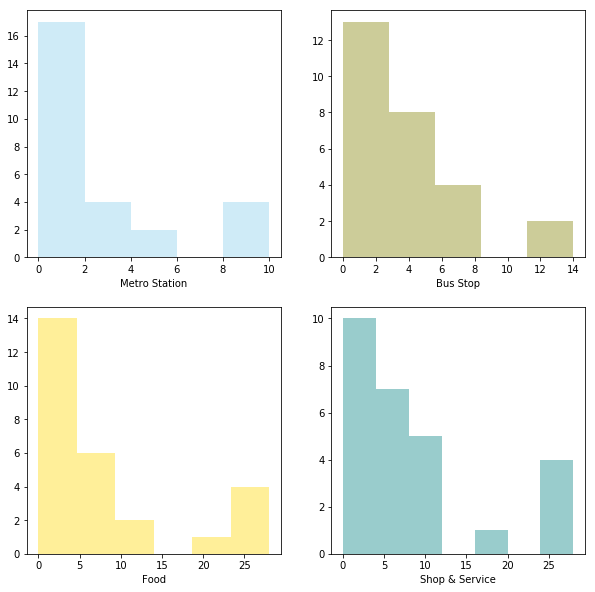

In [96]:
f, axes = plt.subplots(2, 2, figsize=(10, 10))
sns.distplot(df_venues_count['Metro Station'] , color="skyblue", ax=axes[0, 0], kde=False)
sns.distplot(df_venues_count['Bus Stop'] , color="olive", ax=axes[0, 1], kde=False)
sns.distplot(df_venues_count['Food'] , color="gold", ax=axes[1, 0], kde=False)
sns.distplot(df_venues_count['Shop & Service'] , color="teal", ax=axes[1, 1], kde=False)


The distribution of other variables are quite similar. Now check their Pearson Correlation

In [97]:
df_venues_count.corr()

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
Category,,,,,
Arts & Entertainment,1.000000,0.636948,0.757111,0.395491,0.754646
Bus Stop,0.636948,1.000000,0.852480,0.328696,0.661675
Food,0.757111,0.852480,1.000000,0.365206,0.824137
Metro Station,0.395491,0.328696,0.365206,1.000000,0.372522
Shop & Service,0.754646,0.661675,0.824137,0.372522,1.000000


It seems that 'Bus Stop', 'Shop & Service' and 'MEtro Station' category are highly correlated.
<br>Find P-Value of the variables </br>

By convention, when the p-value is:

< 0.001 we say there is strong evidence that the correlation is significant,<br>
< 0.05; there is moderate evidence that the correlation is significant,<br>
< 0.1; there is weak evidence that the correlation is significant, and<br>
if > 0.1; there is no evidence that the correlation is significant.<br>

In [103]:
!conda install -c conda-forge folium=0.5 --yes
import folium

print('Folium installed and imported!')

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::anaconda==5.3.1=py37_0
  - defaults/linux-64::astropy==3.0.4=py37h14c3975_0
  - defaults/linux-64::bkcharts==0.2=py37_0
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::bokeh==0.13.0=py37_0
  - defaults/linux-64::bottleneck==1.2.1=py37h035aef0_1
  - defaults/linux-64::dask==0.19.1=py37_0
  - defaults/linux-64::datashape==0.5.4=py37_1
  - defaults/linux-64::mkl-service==1.1.2=py37h90e4bf4_5
  - defaults/linux-64::numba==0.39.0=py37h04863e7_0
  - defaults/linux-64::numexpr==2.6.8=py37hd89afb7_0
  - defaults/linux-64::odo==0.5.1=py37_0
  - defaults/linux-64::pytables==3.4.4=py37ha205bf6_0
  - defaults/linux-64::pytest-arraydiff==0.2=py37h39e3cac_0
  - defaults/linux-64::pytest-astropy==0.4.0=py37_0
  - defaults/linux-64::pytest-doctestplus==0.1.3=py37_0
  - defaults/linux-64::pywavelets==1.0.0=py37h

In [98]:
p_value_data = []
for left in df_venues_count.columns:
    p_values = [left]
    for right in df_venues_count.columns:        
        pearson_coef, p_value = stats.pearsonr(df_venues_count[left], df_venues_count[right])
        if(p_value < 0.001):
            p_values.append('strong')
        elif(p_value < 0.05):
            p_values.append('moderate')
        elif(p_value < 0.1):
            p_values.append('weak')
        else:
            p_values.append('no')            
    p_value_data.append(p_values)

In [99]:
df_p_values = pd.DataFrame(p_value_data, columns=['Category'] + df_venues_count.columns.tolist())

In [100]:
df_p_values

,Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
0,Arts & Entertainment,strong,strong,strong,moderate,strong
1,Bus Stop,strong,strong,strong,weak,strong
2,Food,strong,strong,strong,weak,strong
3,Metro Station,moderate,weak,weak,strong,weak
4,Shop & Service,strong,strong,strong,weak,strong


Corrolation between 'Arts & Entertainment','Bus Stop', 'Food', 'Shop & Service' are statistically significant;
and the relationship is positive

In [104]:
BOS_coords = getLatLng('Boston, MA')
BOS_coords

(42.3600825, -71.0588801)

In [126]:
bos_map = folium.Map(location=BOS_coords, zoom_start=12, tiles='Stamen Toner')

rest_fg = folium.FeatureGroup()
targets_fg = folium.FeatureGroup()

for(location, address, latitude, longitude) in  df_proposed_loc.itertuples(index=False):
    targets_fg.add_child(
        folium.features.CircleMarker(
            location=(latitude, longitude),
            popup=location,
            radius=5,
            fill=True,
            color='green',
            fill_opacity=1.
        )
    )

sh_ratings = df_sh_favs_n.set_index('Name')    
name_list = sh_ratings.index.tolist()

for (name, address, latitude, longitude ) in df_ind_rest_N.itertuples(index=False):    

#    color = 'blue'        
#    popup = name
#   
    if(name in name_list ):
        color = 'red'    
        popup = '{} - Rating: {}'.format(name, sh_ratings.loc[name,'Rating'])
    
    rest_fg.add_child(        
        folium.features.CircleMarker(
            location=(latitude, longitude),
            popup=popup,
            radius=5,
            fill=True,
            color='red',
            fill_opacity=1.
        )
    )
    
bos_map.add_child(rest_fg)
bos_map.add_child(targets_fg)
bos_map

Most of Boton's Indian restarants (RED circle) and the list of restaurants given by stakeholders (Green circle) are locates, mostly around shopping malls and/or Colleges and centralized in urban area. 

<h2>4) Decision Making </h2

With the data analysis is done, let's use Content-Based or Item-Item recommendation systems. Basically, by counting number of nearby venues and ratings given to the list and compare it to the stake holder's favorites.

Normalize the values of venues dataframe by using MinMaxScaler method

In [130]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [131]:
venues_normalized = scaler.fit_transform(df_venues_count)

In [132]:
df_venues_normalized = pd.DataFrame(
    venues_normalized,
    index=df_venues_count.index,
    columns=df_venues_count.columns
)

In [133]:
df_venues_normalized.head()

Category,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
Rest Name,,,,,
Akbar Indian,1.000,0.428571,0.464286,0.2,0.321429
Bukhara,0.000,0.000000,0.035714,0.0,0.250000
Chakra Indian Cuisine,0.000,0.071429,0.000000,0.0,0.107143
Divine Indian Food,0.625,1.000000,1.000000,1.0,1.000000
Halal Indian Cuisine,0.000,0.000000,0.035714,0.5,0.107143


In [148]:
sh_rating_table = pd.merge(
    df_sh_favs_n,
    df_venues_normalized,
    how='inner',
    left_on='Name',
    right_index=True
)
sh_rating_table.drop(['Name','Rating'], axis=1, inplace=True)
sh_rating_table

,Arts & Entertainment,Bus Stop,Food,Metro Station,Shop & Service
1,0.000,0.000000,0.000000,0.9,0.035714
2,0.125,0.214286,0.035714,0.0,0.178571
4,0.125,0.000000,0.000000,0.0,0.035714


Merge the data with stake holders favorite list

In [149]:
#dot(.) product to get the weight of rating on each category according to stake holder's  favorite restaurant list
sh_profile = sh_rating_table.transpose().dot(df_sh_favs_shrtlist['Rating'])

In [147]:
#Need to make a quick adjustment to the df_sh_favs_n dataframe only to include the matching entries and drop the others
#that is, Himalayan Kitchen and Punjab Palace.

df_sh_favs_shrtlist = df_sh_favs_n.drop([0,3], axis=0)
df_sh_favs_shrtlist


,Name,Rating
1,Vaisakhi Indian Kitchen,4.6
2,Punjabi Dhaba,4.2
4,Mehak Halal - Pakistani & Indian Cuisine,4.1


In [150]:
sh_profile

Arts & Entertainment    1.037500
Bus Stop                0.900000
Food                    0.150000
Metro Station           4.140000
Shop & Service          1.060714
dtype: float64

#Normalize the values on the target table

In [ ]:
df_targets_normalized = pd.DataFrame(
    scaler.transform(df_target_venues_count),
    index=df_target_venues_count.index,
    columns=df_target_venues_count.columns
)

In [ ]:
df_targets_normalized

<h2>5) Results</h2>
<br>

With the stake holders profile and the complete list of cinemas and their venues count in hand, I am going to take the weighted average of every lcoation based on the profile and recommend the top location that most satisfy it.



In [ ]:
df_recommend = (df_targets_normalized*sh_profile).sum(axis=1)/sh_profile.sum()
df_recommend = df_recommend.reset_index(name='Rating')

In [ ]:
df_possible_locations

In [ ]:
df_final = pd.merge(
    df_proposed_loc,
    df_recommend,
    left_on='Location',
    right_on='Location'
)
df_final.sort_values('Rating', ascending=False, inplace=True)

In [ ]:
print('I should recommend the location "{}" of address "{}" to the stackholder'.format(df_final.iat[0,0], df_final.iat[0,1]))

The result is reasonable. Location "L2" has the most number of venues in category "Bus Stop", "Food", "Metro Station" and "Shop & Service".

In [ ]:
df_target_venues_count.head()

In [ ]:

sh_profile.sort_values(ascending=False)

In [ ]:
df_venues_count.mean().to_frame(name='Average Count')

In [ ]:
df_target_venues_count.mean().to_frame('Average Count')

Based of the weighter average of the locations compared to the list of restaurants provided by the stake holders, the best places to start the new restaurant is
at a place like where <b>Punjabi Dhaba</b> is located. That is either near <b>Harvard University</b> or near <b>Cambridge Side Mall</b>.

<h2> 6) Conclusion </h2>
<br>


In the past few courses, we have learned different techniques and methodologies in data gathering, cleaning and analyzing data. Also we learned different methodologies and when to use them. 

In this very practical, real life exercise, we were challenged with to find the best location to open a new Indian restaurants in the Boston neighborhood. Also we were given a short listed location where the stake holders preferred  to open a restaurant.

What we did as part of the exercise was that we took a list of Indian restaurants in Boston and the near by neighborhood like Cambridge, Somerville, Brighton etc and analyzed its neighborhood on various factors like, what are the type of businesses around then, how quickly they are accessible using public transportation etc. 

We did the same to the stake holders provided list of locations and another set of preferred locations. We performed similar analysis on these locations as well. And eliminated any attribute which are less significant than others. This gave us the final datasets. 

Using these data sets, and using different analysis methods, ML techniques etc, we identified one final location which scored high in weighted average comparisons. Based on the predictive analysis, we concluded that the 'Punjabi Dhaba' restaurant is located in the best place. And a similar place for the new restaurant would be an ideal fit. Based on our work in this project, we recommended two landmarks for this new restaurants and anywhere in this neighborhood would be a perfect location.
